<a href="https://colab.research.google.com/github/annisasuprima/Big-Data/blob/main/1811521015_Tugas_Pertemuan_12_Bab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCING SCIKIT-LEARN**

**DATA REPRESENTATION IN SCIKIT-LEARN**

**DATA AS TABLE**

Tabel dasar adalah kisi data dua dimensi, di mana baris mewakili elemen individu dari kumpulan data, dan kolom mewakili jumlah yang terkait dengan masing-masing
elemen-elemen ini. Misalnya, pertimbangkan kumpulan data Iris, yang terkenal dianalisis oleh Ronald
Fisher pada tahun 1936. Kita dapat mendownload dataset ini dalam bentuk Pandas DataFrame
menggunakan seaborn library


disini terlebih dahulu kita import seaborn,kemudian kita load dataset nya yang bernama iris

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**TARGET ARRAY**

Fitur yang membedakan dari array target adalah biasanya jumlahnya
diprediksi dari data: dalam istilah statistik,variabel dependen.

Misalnya, dalam data sebelumnya kita mungkin ingin membuat model yang dapat memprediksi spesies bunga berdasarkan ukuran lainnya; dalam hal ini, kolom spesies akan dianggap sebagai fitur. 

disini kita gunakan matplotlib untuk melakukan plotting, kemudian kita import seaborn kemudian disini kita menggunakan data set iris, tentukan warna nya, dan ukuran.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


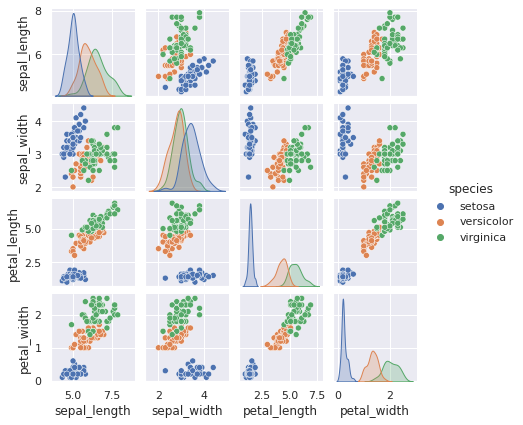

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

plot diatas dapat digunakan di Scikit-Learn, dengan mengekstrak matriks fitur dan array target dari
DataFrame, yang dapat kita lakukan menggunakan beberapa operasi Pandas DataFrame 

Disini method drop() digunakan untuk menghapus kolom, dengan kolom yang ingin dihapus dan set nilai Axis=1 . Untuk data yang merupakan fitur disimpan pada variabel X, sedangkan data yang merupakan label kelas disimpan pada variabel y.

In [ ]:
X_iris = iris.drop('species', axis=1)
X_iris.shape


(150, 4)

In [ ]:
y_iris = iris['species']
y_iris.shape


(150,)

**Scikit-Learn’s Estimator API**

**Supervised learning example: Simple linear regression**

Sebagai contoh dari proses ini, mari kita pertimbangkan regresi linier sederhana yaitu,
kasus umum pemasangan garis ke data x, y. Kita akan menggunakan data sederhana berikut untuk
contoh regresi : 

seperti biasa kita mengimport library yang digunakan yaitu matplotlib dan numpy, kemudian kita ambil angka secara acak menggunakan rand()
, dan kita melakukan plotting dengan plt.scatter

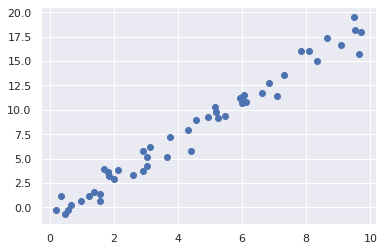

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

Dengan data ini, kita dapat menggunakan resep yang diuraikan sebelumnya. Mari kita telusuri
proses:

**1. Pilih kelas model.**

Dalam Scikit-Learn, setiap kelas model diwakili oleh kelas Python. Maka untuk
Misalnya, jika kita ingin menghitung model regresi linier sederhana, kita bisa
impor kelas regresi linier 

In [ ]:
from sklearn.linear_model import LinearRegression

**2. Pilih hyperparameter model.**

Poin penting adalah bahwa kelas model tidak sama dengan instance dari a
model. 

Untuk contoh regresi linier kita, kita dapat membuat instance LinearRegression
kelas dan tentukan bahwa kita ingin menyesuaikan intersep menggunakan fit_inter kecuali hyperparameter: 

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**3.Menyusun data menjadi matriks fitur dan vektor target.**

In [ ]:
#pembentukan kembali sederhana dari array satu dimensi: 
X = x[:, np.newaxis]
X.shape

(50, 1)

**4. Sesuaikan model dengan data Anda**

Sekarang saatnya menerapkan model ke data dengan method fit ()

In [ ]:
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Di Scikit-Learn, berdasarkan konvensi semua parameter model yang dipelajari selama proses fit () memiliki jejak
garis bawah (_);

In [ ]:
model.coef_

array([1.9776566])

In [ ]:
model.intercept_

-0.9033107255311146

**5. Memprediksi label untuk data yang tidak diketahui.**

Setelah model dilatih, tugas utama machine learning yang diawasi adalah
mengevaluasinya berdasarkan apa yang dikatakan tentang data baru yang bukan bagian dari training
set. Di Scikit-Learn, kita bisa melakukan ini menggunakan metode predict (). Demi
contoh ini, "new data" akan menjadi kisi nilai x, dan akan menanyakan y values model yang diprediksi: 

In [ ]:
xfit = np.linspace(-1, 11)

kita perlu memaksa nilai x ini menjadi [n_samples, n_features]
fitur matriks, setelah itu kita dapat memasukkannya ke model: 

In [ ]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

kita visualisasikan hasil dengan memplot data mentah terlebih dahulu

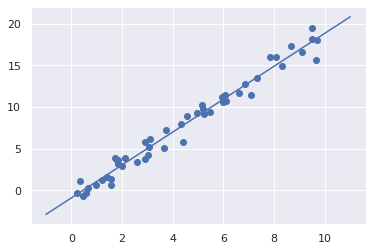

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);


**Supervised learning example: Iris classification**

Untuk tugas ini, kita akan menggunakan model generatif yang sangat sederhana yang dikenal sebagai Gaussian
naive Bayes, yang melanjutkan dengan mengasumsikan setiap kelas diambil dari sebuah sumbu-rata
Distribusi Gaussian

Kita akan mengevaluasi model pada data yang belum pernah dilihat sebelumnya, jadi kita akan melakukan membagi data menjadi satu training set dan satu testing set. dengan menggunakan fungsi utilitas train_test_split 

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)


data yang tersusun, kita bisa mengikuti langkah kita untuk memprediksi label: 

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new dat

kita dapat menggunakan utilitas accuracy_score untuk melihat pecahan label yang diprediksi
yang sesuai dengan nilai sebenarnya: 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Dengan akurasi melebihi 97%, kita melihat bahwa algoritme klasifikasi yang very naive ini pun efektif untuk kumpulan data pada khusus ini

**Unsupervised learning example: Iris dimensionality**

Sebagai contoh : pengurangan
dimensi data Iris agar lebih mudah memvisualisasikannya. 
Ingatlah bahwa data Iris
adalah empat dimensi: ada empat fitur yang direkam untuk setiap sampel.
Tugas reduksi dimensionalitas adalah menanyakan apakah ada representasi dimensi bawah yang sesuai yang mempertahankan fitur-fitur penting dari data. 
dimensionality reduksi dimensi digunakan sebagai bantuan untuk memvisualisasikan data;
Di sini kita akan menggunakan analisis komponen utama (PCA) yang merupakan teknik pengurangan dimensi linier yang cepat. Kita akan meminta model untuk mengembalikan dua komponen — yaitu, dua dimensi
representasi data. 

In [ ]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

Sekarang mari kita gambarkan hasilnya. Cara cepat untuk melakukannya adalah dengan memasukkan hasil ke dalam Iris DataFrame asli, dan menggunakan lmplot Seaborn untuk menampilkan hasil 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


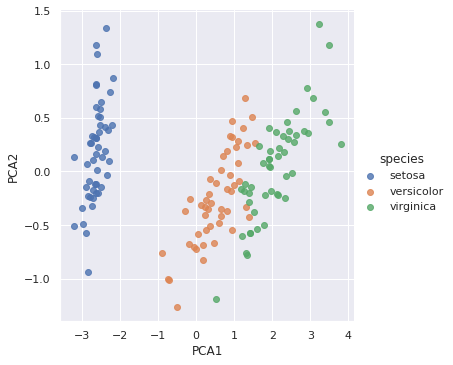

In [ ]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

**Application: Exploring Handwritten Digits**

Di sini kita akan mengambil jalan pintas dan menggunakan kumpulan angka yang telah diformat sebelumnya dari Scikit-Learn,
yang dibangun ke dalam library

**Loading and visualizing the digits data**


Kita akan menggunakan interface akses data Scikit-Learn untuk melihat data : 

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape


(1797, 8, 8)

Image data adalah array tiga dimensi: dengan 1.797 sampel, yang masing-masing terdiri dari file
8 × 8 kotak piksel. 

Mari kita visualisasikan seratus yang pertama : 

Sebelumnya kita import library yang kita gunakan yaitu matplotlib, kemudian kita tur peletakan subplotnya dan ukuran,
sublot_kw dengan kata Dict  yang 
diteruskan ke panggilan add_subplot yang digunakan untuk membuat setiap subplot.
Dict dengan kata kunci yang diteruskan ke konstruktor GridSpec yang digunakan untuk membuat grid tempat subplot ditempatkan. dan ax berupa objek Sumbu tunggal atau array objek Sumbu jika lebih dari satu subplot dibuat. 


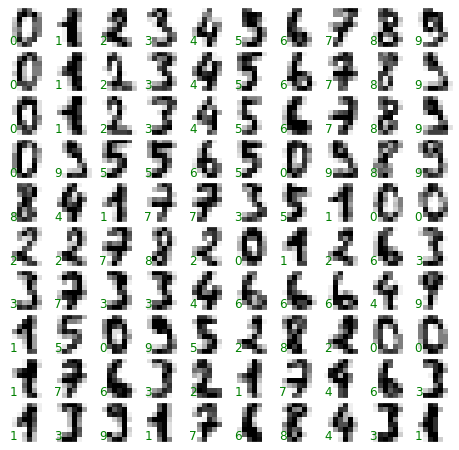

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),
          transform=ax.transAxes, color='green')

Untuk bekerja dengan data ini dalam Scikit-Learn, kita membutuhkan dua dimensi,
Representasi [n_samples, n_features]. 

Kita dapat mencari ini dengan memperlakukan masing-masing
piksel dalam gambar sebagai fitur,  Selain itu, kita membutuhkan
array target, yang memberikan label yang telah ditentukan sebelumnya untuk setiap digit.

In [ ]:
#membuat array target
X = digits.data
X.shape


(1797, 64)

In [ ]:
y = digits.target
y.shape


(1797,)

Kita dapat melihat di sini ada 1.797 sampel dan 64 fitur. 

**Unsupervised learning: Dimensionality reduction**


Kita akan mengurangi dimensi menjadi 2, menggunakan metode unsupervised. Di sini, kita akan menggunakan algoritme pembelajaran berjenis yang disebut Isomap, dan merubah data menjadi 2 dimensi

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

Selanjutnya kita melakukan plotting utnuk melihat strukturnya

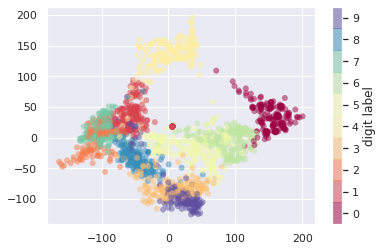

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

**Classification on digits**

Mari terapkan algoritme klasifikasi ke angka. Seperti data Iris sebelumnya, kita akan membagi data menjadi training set dan test set, dan menyesuaikan model Gaussian naive Bayes: 

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:
#importGaussuan NB
#bagi data menjadi training dan test set
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [ ]:
#ukur akurasinya dengan membandingkan nilai sebenarnya dari tes yang ditetapkan ke prediksi:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Kita menemukan akurasi sekitar 80% untuk klasifikasi dari angka! 
Namun, angka tunggal ini tidak memberi tahu kita di mana kesalahan kita. 

Salah satu cara terbaik untuk melakukannya adalah dengan menggunakan matriks confussion, yang dapat kita hitung dengan
Scikit-Learn dan plot dengan Seaborn 

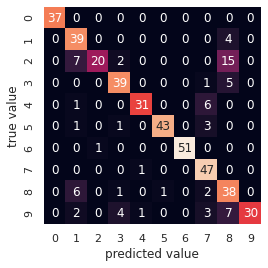

In [ ]:
#import matriks confusion, dan hitung plotnya menggunakan heatmaps.
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');


Cara lain untuk mendapatkan intuisi
karakteristik model adalah memplot input lagi, dengan label prediksi mereka.
Kita akan menggunakan hijau untuk label yang benar, dan merah untuk label yang salah 

sublot_kw dengan kata Dict  yang 
diteruskan ke panggilan add_subplot yang digunakan untuk membuat setiap subplot.
Dict dengan kata kunci yang diteruskan ke konstruktor GridSpec yang digunakan untuk membuat grid tempat subplot ditempatkan. dan ax berupa objek Sumbu tunggal atau array objek Sumbu jika lebih dari satu subplot dibuat. 


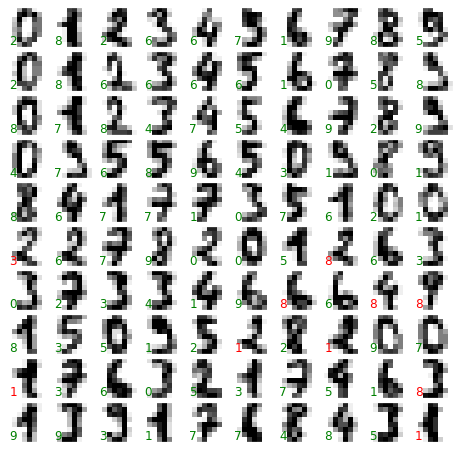

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(y_model[i]),
          transform=ax.transAxes,
          color='green' if (ytest[i] == y_model[i]) else 'red')

**Hyperparameters and Model Validation**


**Model validation the wrong way**


pendekatan naive untuk validasi menggunakan data Iris, yang kita lihat
di bagian sebelumnya. 

Kita akan mulai dengan memuat data: 

In [ ]:
#import iris, dan masukkan ke variabel data=x target=y
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Selanjutnya kita memilih model dan hyperparameter. Di sini kita akan menggunakan pengklasifikasi k-neighbours
dengan n_neighbours = 1. 
 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)


Kemudian kita melatih model, dan menggunakannya untuk memprediksi label untuk data yang sudah kita  ketahui: 

In [ ]:
model.fit(X, y)
y_model = model.predict(X)

In [ ]:
#Hitung pecahan dari poin yang diberi label dengan benar
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)


1.0

**Model validation the right way: Holdout sets**

Kita bisa lebih memahami performa model menggunakan apa
dikenal sebagai set holdout; artinya, kami menahan beberapa subset data dari pelatihan
model, lalu gunakan set holdout ini untuk memeriksa kinerja model. Kita dapat
lakukan pemisahan ini menggunakan utilitas train_test_split di Scikit-Learn: 

In [ ]:
from sklearn.model_selection import train_test_split
 # split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.5)
 # fit the model on one set of data
model.fit(X1, y1)
 # evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)


0.9066666666666666

**Model validation via cross-validation**


Di sini kita melakukan dua uji validasi, secara bergantian menggunakan setiap setengah data sebagai pisahan
set. Menggunakan data terpisah dari sebelumnya, kita bisa menerapkannya seperti ini:

In [ ]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

Di sini kami membagi data menjadi lima kelompok, dan menggunakan masing-masing secara bergiliran untuk mengevaluasi
model fit pada 4/5 data lainnya.

kita bisa menggunakan cross_val_score Scikit-Learn untuk melakukannya
secara ringkas: 

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Scikit-Learn mengimplementasikan sejumlah skema validasi silang yang berguna dalam situasi tertentu; ini diimplementasikan melalui iterator dalam mod- cross_validation
ule. Misalnya, kita mungkin ingin beralih ke kasus ekstrem di mana nomor
lipatan sama dengan jumlah titik data;

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
#ambil rata-rata
scores.mean()


0.96

**Selecting the Best Model**


**Validation curves in Scikit-Learn**

Mari kita lihat contoh penggunaan validasi silang untuk menghitung kurva validasi
kelas model. Di sini kita akan menggunakan model regresi polinomial: model ini digeneralisasikan
model linier di mana derajat polinomial adalah parameter tunable

Di Scikit-Learn, kita bisa
menerapkan dengan regresi linier sederhana yang dikombinasikan dengan preprocessor polinomial. kita akan menggunakan pipeline untuk merangkai operasi ini bersama-sama 

pertama kita import semua library yang dibutuhkan, dan panggil pipelinenya.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                       LinearRegression(**kwargs))


In [87]:
#buat beberapa data, dengan import library numpy
#gunakan rand untuk mendapatkan angka secara acak
import numpy as np

def make_data(N, err=1.0, rseed=1):

    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
      y += err * rng.randn(N)
      return X, y
X, y = make_data(40)

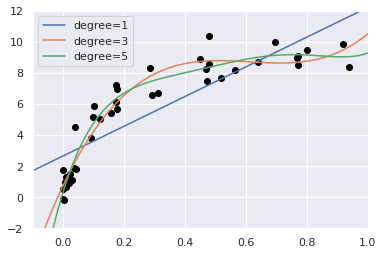

In [88]:
#memvisualisasikan datadengan kesesuaian polinomial beberapa derajat 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

memvisualisasikan kurva validasi khusus ini
data dan model; kita bisa melakukan ini secara langsung menggunakan validation_curve conve‐
rutinitas ilmu pengetahuan disediakan oleh Scikit-Learn. Diberikan model, data, nama parameter, dan a
rentang untuk dijelajahi, fungsi ini akan secara otomatis menghitung skor pelatihan dan
skor validasi di seluruh rentang 

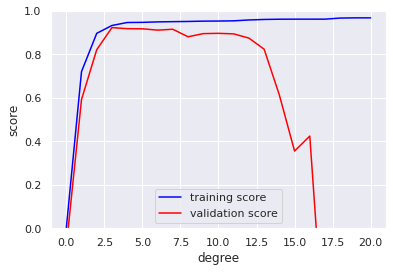

In [92]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree',
                                          degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Dari kurva validasi, kita dapat membaca bahwa trade-off yang optimal antara bias
dan varians ditemukan untuk polinomial orde tiga; kita dapat menghitung dan menampilkan ini
menyesuaikan data asli sebagai berikut 

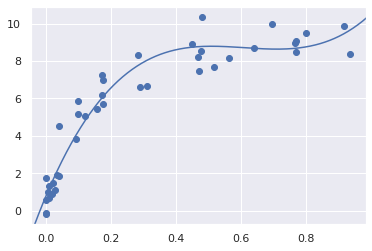

In [93]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);


**Learning Curves**

Salah satu aspek penting dari kompleksitas model adalah model yang optimal secara umum
bergantung pada ukuran data pelatihan Anda. Misalnya, mari buat set data baru dengan faktor lima poin 

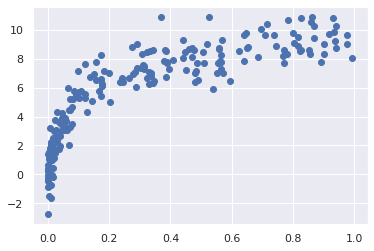

In [94]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

Kita akan menduplikasi kode sebelumnya untuk memplot kurva validasi untuk kumpulan data yang lebih besar ini; untuk referensi mari kita plot hasil sebelumnya juga 

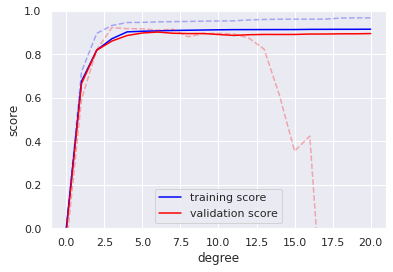

In [95]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree',
                                            degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
         label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
         linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
         linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');


**Learning curves in Scikit-Learn**


Scikit-Learn menawarkan utilitas yang nyaman untuk menghitung kurva pembelajaran seperti itu dari Anda
model; di sini kita akan menghitung kurva pembelajaran untuk dataset asli kita dengan model polinomial orde dua dan polinomia orde sembilan 

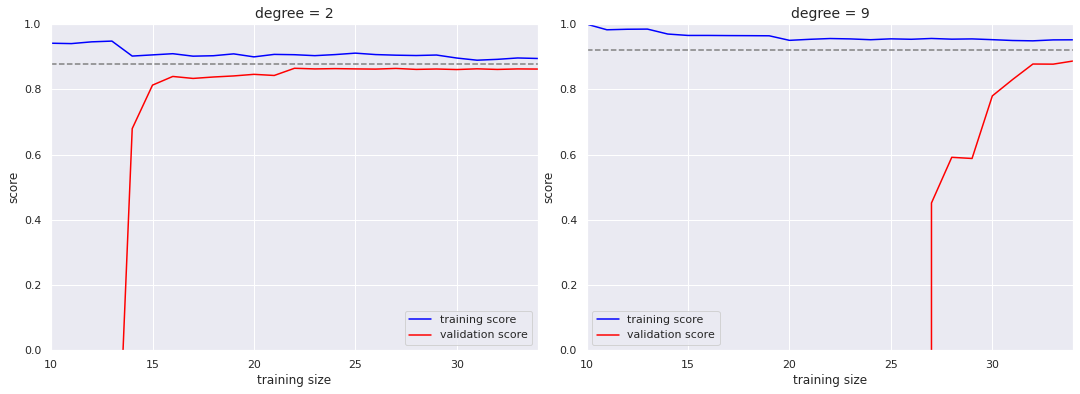

In [90]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
  N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                       X, y, cv=7,
                                       train_sizes=np.linspace(0.3, 1, 25))
  ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
  ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
  ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
               linestyle='dashed')
  ax[i].set_ylim(0, 1)
  ax[i].set_xlim(N[0], N[-1])
  ax[i].set_xlabel('training size')
  ax[i].set_ylabel('score')
  ax[i].set_title('degree = {0}'.format(degree), size=14)
  ax[i].legend(loc='best')

**Validation in Practice: Grid Search**

contoh penggunaan pencarian grid untuk menemukan model polinomial yang optimal. Kita akan
mengeksplorasi kisi tiga dimensi fitur model — yaitu, derajat polinomial, flag yang memberi tahu kami apakah akan memasang intersep, dan bendera memberi tahu kami apakah harus
malisasikan masalahnya. Kita dapat mengatur ini menggunakan pengukur meta GridSearchCV Scikit-Learn: 

In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)


metode fit () akan menyesuaikan model pada setiap titik kisi, mencatat skornya sepanjang jalan: 

In [96]:
grid.fit(X, y);


In [85]:
#best parameter
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': False,
 'polynomialfeatures__degree': 2}

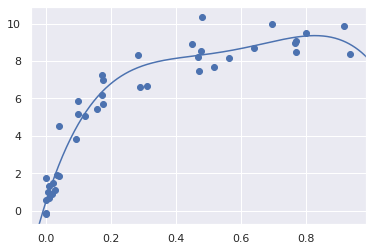

In [99]:
#gunakan model terbaik
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);